Adapted from: Software Carpentry - Programming with Python (v5)

# Programming with Python

The best way to learn how to program is to do something useful and relevant to you.
So, this introduction to Python is built around a common data analysis task.


### About Jupyter (former IPython) notebooks
This tutorial is a Jupyter notebook. It's a browser based interactive Python computing environment that allows you to mix markdown with executable Python code - yes, similar to R Markdown, but different. It's very easy to use but there are a ton of useful features that may not be apparent at first. For example, while code cells are used primarily for executing Python code, you can also do things like running Linux shell commands via something known as *magics*. We'll even learn how to run R commands from Juptyer notebooks using *rmagic*. Check out the [Jupyter notebook documentation](https://jupyter.readthedocs.io/en/latest/index.html) to learn how to be an efficient IPython notebook user. In addition, see Chapter 1 of our **Python Data Science Handbook** by Jake VanderPlas (PDSH by JVP for short). Learning a few of the following:

* keyboard shortcuts
* magic commands
* using shell commands from the notebook
* pdb debugger

can make you a more efficient Jupyter notebook user. 

In [ ]:
!pwd

## Learning Objectives

 *   Explain what a library is, and what libraries are used for.
 *   Load a Python library and use the things it contains.
 *   Read tabular data from a file into an appropriate data structure.
 *   Assign values to variables.
 *   Select individual values and subsections from data.
 *   Perform operations on arrays of data.
 *   Display simple graphs.



## Analyzing Patient Data
We are studying inflammation in patients who have been given a new treatment for arthritis,
and need to analyze the first dozen data sets.
The data sets are stored in comma-separated values (CSV) format:

* each row holds information for a single patient,
* and the columns represent successive days.



We want to:

*   load that data into memory,
*   calculate the average inflammation per day across all patients (i.e. column averages), and
*   plot the result.

To do all that, we'll have to learn a little bit about Python programming.



> ## Prerequisites
> 
> Learners need to understand the concepts of files and directories
> (including the working directory) and how to start a Python
> interpreter before tackling this lesson. This lesson references the Jupyter (IPython)
> Notebook although it can be taught through any Python interpreter.
> The commands in this lesson pertain to **Python 3**.


Before reading the whole data file, let's use our Linux shell skills to display the first five lines of the first data file. Yes, we can use system commands from within the Jupyter notebook by prefacing the command with the !.

In [ ]:
# Do a directory listing


In [ ]:
# Now list the files in the data folder
!ls data

In [ ]:
# Now display the first 5 lines from the first inflammation data file. Yes, tab-completion 
# still works.
!head data/inflammation-01.csv

Hmmm... If we were allowed to use Excel, we'd simply import this text data and build formulas to compute averages and throw some graphs together. But we can't. So, we are going to need to get this data into some sort of *container* or *data structure* that will facilitate both statistical analysis as well as plotting. Over the next few sessions we'll learn about number of different containers for storing and working with this type of data including:

* numpy arrays
* lists
* dictionaries
* pandas DataFrame

However, let's step back and instead of considering a table of data,
consider the simplest "collection" of data, a single value.
The line below assigns the value `55` to a variable `weight_kg`:

In [ ]:
weight_kg = 55 # Variable name equals to

Once a variable has a value, we can print it to the screen:

In [ ]:
print(weight_kg)

In [ ]:
weight_kg # Ankita's Part

and do arithmetic with it:

In [ ]:
print('weight in pounds:', 2.2 * weight_kg)

We can also change a variable's value by assigning it a new one:

In [7]:
weight_kg = 57.5
print('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 57.5


As the example above shows,
we can print several things at once by separating them with commas.

If we imagine the variable as a sticky note with a name written on it,
assignment is like putting the sticky note on a particular value:

<img src="img/python-sticky-note-variables-01.svg" alt="Variables as Sticky Notes" />

This means that assigning a value to one variable does *not* change the values of other variables.
For example,
let's store the subject's weight in pounds in a variable:

In [8]:
weight_lb = 2.2 * weight_kg
print('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

weight in kilograms: 57.5 and in pounds: 126.50000000000001


<img src="img/python-sticky-note-variables-02.svg" alt="Creating Another Variable" />

and then change `weight_kg`:

In [9]:
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

weight in kilograms is now: 100.0 and weight in pounds is still: 126.50000000000001


<img src="img/python-sticky-note-variables-03.svg" alt="Updating a Variable" />

Since `weight_lb` doesn't "remember" where its value came from,
it isn't automatically updated when `weight_kg` changes.
This is different from the way spreadsheets work.


In several of the `print()` statements above, we printed a combination of variables and *string literals* - the things with quotes around them. Of course, we can also have string variables. For example:

In [ ]:
weight_kg = 57.5
message = 'weight in kilograms is now:'
print(message, weight_kg)

In [21]:
weight_kg = 55

You can use the `whos` command at any time to see what variables you have created and what modules you have loaded into the computers memory. As this is an IPython command, it will only work if you are in an IPython terminal or the Jupyter Notebook. 

In [20]:
whos # Special Notebook Commands

No variables match your requested type.


> ## About data types
> For those of you who've programmed in languages like Visual Basic (or VBA) or Java,
> you might have noticed that we don't declare the data types for our variables. We
> simply use them as we wish. Python is a *dynamically-typed* language. We'll revisit this topic often.

In [22]:
type(message)

NameError: name 'message' is not defined

In [ ]:
message = 100

In [ ]:
type(message)

## Reading one csv file into an array

While a lot of powerful tools are built into languages like Python,
even more live in the libraries they are used to build.

In order to load our inflammation data, we will import a library called [NumPy](http://www.numpy.org/)
that knows how to work with arrays. NumPy is one of the foundational packages
for doing data science work in Python. Many other useful Python data analysis packages 
use NumPy under the hood. For example, **pandas** is a widely used data analysis package
that we'll be using in this class and it relies heavily on NumPy. This tutorial will,
in addition to teaching the basics of Python programming, will give you a glimpse into
this important Python library for analytical computing. Chapter 2 of PDSH by JVP has
a very thorough introdcutiont to NumPy.


> Arrays are no big deal. A 2-D array is a lot like a sheet in an Excel workbook.
> Arrays are fundamental to computational data science work.



In [23]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker
and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space.
Once you've loaded the library,
we can ask the library to read our data file for us:

In [27]:
numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [ ]:
# Alt-Enter gets this new Code Cell

The expression `numpy.loadtxt(...)` is a [function call](reference.html#function-call)
that asks Python to run the function `loadtxt` that belongs to the `numpy` library.
This [dotted notation](reference.html#dotted-notation) is used everywhere in Python
to refer to the parts of things as `thing.component`.

`numpy.loadtxt` has two [parameters](reference.html#parameter):
the name of the file we want to read,
and the [delimiter](reference.html#delimiter) that separates values on a line.
These both need to be character strings (or [strings](reference.html#string) for short),
so we put them in quotes.

When we are finished typing and press Shift+Enter,
the notebook runs our command.
Since we haven't told it to do anything else with the function's output,
the notebook displays it.
In this case,
that output is the data we just loaded.
By default,
only a few rows and columns are shown
(with `...` to omit elements when displaying big arrays).
To save space,
Python displays numbers as `1.` instead of `1.0`
when there's nothing interesting after the decimal point.

> In addition to Shift-Enter, try Ctrl-Enter and Alt-Enter to see the different behaviors when running cells.

Our call to `numpy.loadtxt` read our file,
but didn't save the data in memory.
To do that,
we need to [assign](reference.html#assignment) the array to a [variable](reference.html#variable).
A variable is just a name for a value,
such as `x`, `current_temperature`, or `subject_id`.
Python's variables must begin with a letter and are [case sensitive](reference.html#case-sensitive).
We can create a new variable by assigning a value to it using `=`. Just as we can assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let's re-run numpy.loadtxt and save its result:


In [30]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

This statement doesn't produce any output because assignment doesn't display anything.
If we want to check that our data has been loaded,
we can print the variable's value:

In [31]:
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Now that our data is in memory,
we can start doing things with it.
First,
let's ask what [type](reference.html#type) of thing `data` refers to:

In [32]:
print(type(data))

<class 'numpy.ndarray'>


The output tells us that `data` currently refers to an N-dimensional array created by the NumPy library. These data correspond to arthritis patients' inflammation. The rows are the individual patients and the columns are their daily inflammation measurements.
We can see what its [shape](reference.html#shape) is like this:

In [33]:
print(data.shape)

(60, 40)


This tells us that `data` has 60 rows and 40 columns. When we created the
variable `data` to store our arthritis data, we didn't just create the array, we also
created information about the array, called [members](reference.html#member) or
attributes. This extra information describes `data` in
the same way an adjective describes a noun.
`data.shape` is an attribute  of `data` which described the dimensions of `data`.
We use the same dotted notation for the attributes of variables
that we use for the functions in libraries
because they have the same part-and-whole relationship.

If we want to get a single number from the array,
we must provide an [index](reference.html#index) in square brackets,
just as we do in math:

In [34]:
print('first value in data:', data[0, 0])

first value in data: 0.0


In [35]:
print('some middle value in data:', data[30, 20]) # Python starts with 0 & R starts with 1

some middle value in data: 13.0


The expression `data[30, 20]` may not surprise you,
but `data[0, 0]` might.
Programming languages like Fortran and MATLAB and R start counting at 1,
because that's what human beings have done for thousands of years.
Languages in the C family (including C++, Java, Perl, and Python) count from 0
because that's simpler for computers to do.
As a result,
if we have an M&times;N array in Python,
its indices go from 0 to M-1 on the first axis
and 0 to N-1 on the second.
It takes a bit of getting used to,
but one way to remember the rule is that
the index is how many steps we have to take from the start to get the item we want.

> ## In the Corner
>
> What may also surprise you is that when Python displays an array,
> it shows the element with index `[0, 0]` in the upper left corner
> rather than the lower left.
> This is consistent with the way mathematicians draw matrices,
> but different from the Cartesian coordinates.
> The indices are (row, column) instead of (column, row) for the same reason,
> which can be confusing when plotting data.

An index like `[30, 20]` selects a single element of an array,
but we can select whole sections as well.
For example,
we can select the first ten days (columns) of values
for the first four patients (rows) like this:

In [36]:
print(data[0:4, 0:10]) # 4 rows & 10 columns 

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


The [slice](reference.html#slice) `0:4` means,
"Start at index 0 and go up to, but not including, index 4."
Again,
the up-to-but-not-including takes a bit of getting used to,
but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

You can even use negative index values. When you see a negative sign, you start counting from the end of the array (or list).

Here's a visual from the Practical Computing for Biologists book to help you with slices.

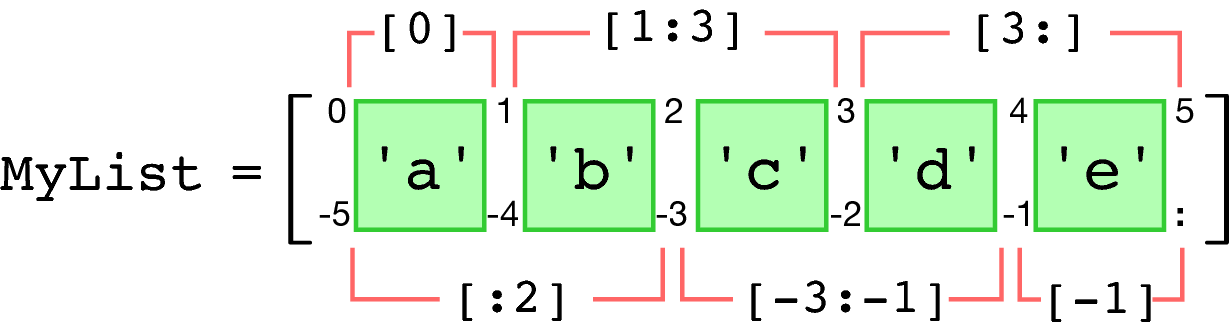

In [37]:
from IPython.display import Image
Image(filename='img/ListIndexingAndSlicing.png') 

We don't have to start slices at 0:

In [38]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


We also don't have to include the upper and lower bound on the slice.
If we don't include the lower bound,
Python uses 0 by default;
if we don't include the upper,
the slice runs to the end of the axis,
and if we don't include either
(i.e., if we just use ':' on its own),
the slice includes everything:

In [39]:
small = data[:3, 36:]
print('small is:')
print(small)

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


Arrays also know how to perform common mathematical operations on their values.
The simplest operations with data are arithmetic:
add, subtract, multiply, and divide.
 When you do such operations on arrays,
the operation is done on each individual element of the array.
Thus:

In [40]:
doubledata = data * 2.0

will create a new array `doubledata`
whose elements have the value of two times the value of the corresponding elements in `data`:

In [41]:
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


If,
instead of taking an array and doing arithmetic with a single value (as above)
you did the arithmetic operation with another array of the same shape,
the operation will be done on corresponding elements of the two arrays.
Thus:

In [42]:
tripledata = doubledata + data

will give you an array where `tripledata[0,0]` will equal `doubledata[0,0]` plus `data[0,0]`,
and so on for all other elements of the arrays.

In [43]:
print('tripledata:')
print(tripledata[:3, 36:])

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


Often, we want to do more than add, subtract, multiply, and divide values of data.
Arrays also know how to do more complex operations on their values.
If we want to find the average inflammation for all patients on all days,
for example,
we can just ask the array for its mean value

In [44]:
print(data.mean())

6.14875


`mean` is a [method](reference.html#method) of the array,
i.e.,
a function that belongs to it
in the same way that the member `shape` does.
If variables are nouns, methods are verbs:
they are what the thing in question knows how to do.
We need empty parentheses for `data.mean()`,
even when we're not passing in any parameters,
to tell Python to go and do something for us. `data.shape` doesn't
need `()` because it is just a description but `data.mean()` requires the `()`
because it is an action.

NumPy arrays have lots of useful methods:

In [45]:
print('maximum inflammation:', data.max())
print('minimum inflammation:', data.min())
print('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


When analyzing data,
though,
we often want to look at partial statistics,
such as the maximum value per patient
or the average value per day.
One way to do this is to create a new temporary array of the data we want,
then ask it to do the calculation:

In [46]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


We don't actually need to store the row in a variable of its own.
Instead, we can combine the selection and the method call:

In [47]:
print('maximum inflammation for patient 2:', data[2, :].max())

maximum inflammation for patient 2: 19.0


What if we need the maximum inflammation for *all* patients (as in the
next diagram on the left), or the average for each day (as in the
diagram on the right)? As the diagram below shows, we want to perform the
operation across an axis.

* Axis 0 is the rows
* Axis 1 is the columns
* If you want the average of a row, you are averaging **across the columns** or across axis 1.
* If you want the average of a column, you are averaging **across the rows** or across axis 0.

<img src="fig/python-operations-across-axes.svg" alt="Operations Across Axes" />

To support this,
most array methods allow us to specify the axis we want to work on.
If we ask for the average across axis 0 (rows in our 2D example),
we get:

In [48]:
print(data.mean(axis=0)) # Average across the rows - we get one value per column

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


As a quick check,
we can ask this array what its shape is:

In [49]:
print(data.mean(axis=0).shape) # This vector should be 40 x 1 since there are 40 columns.

(40,)


The expression `(40,)` tells us we have an N&times;1 vector,
so this is the average inflammation per day for all patients.
If we average across axis 1 (columns in our 2D example), we get:

In [50]:
print(data.mean(axis=1))
print(data.mean(axis=1).shape)

[ 5.45   5.425  6.1    5.9    5.55   6.225  5.975  6.65   6.625  6.525
  6.775  5.8    6.225  5.75   5.225  6.3    6.55   5.7    5.85   6.55
  5.775  5.825  6.175  6.1    5.8    6.425  6.05   6.025  6.175  6.55
  6.175  6.35   6.725  6.125  7.075  5.725  5.925  6.15   6.075  5.75
  5.975  5.725  6.3    5.9    6.75   5.925  7.225  6.15   5.95   6.275  5.7
  6.1    6.825  5.975  6.725  5.7    6.25   6.4    7.05   5.9  ]
(60,)


which is the average inflammation per patient across all days.

### Review: Linux shell command challenge
Well we know we can count the number of lines in our file (inflammation-01.csv) using `wc`.

    $wc -l inflammation-01.csv
    
How about the number of columns? If we could count the commas, we'd know that there was one
more column than that number. So, how could you use a combination of `head`, `grep`, and `wc`
to count the commas? You can actually try it in the code cell below using the magic ! key. In
other words, you can run any shell command from within the Jupyter notebook by prefacing it with an
exclamation point. The solution is at the bottom of this file. HINT: Look at the options for `grep`.

## Plotting

The mathematician Richard Hamming once said,
"The purpose of computing is insight, not numbers,"
and the best way to develop insight is often to visualize data.
Visualization deserves an course of its own,
but we can explore a few features of Python's `matplotlib` library here.
While there is no "official" plotting library,
this package is the de facto standard.
First,
we will import the `pyplot` module from `matplotlib`
and use two of its functions to create and display a heat map of our data:

> ### Don't panic warning
> We are NOT learning `matplotlib` until a later session. We are just
> using it here to introduce it and to be able to generate some plots.

> ## Some magic
>
> **IMPORTANT** If you're using an IPython / Jupyter notebook,
> you'll need to execute the following command
> in order for your matplotlib images to appear
> in the notebook when `show()` is called:
>


In [51]:
%matplotlib inline   # Run the command & put it in the Notebook

> The `%` indicates an IPython/Jupyter magic function -
> a function that is only valid within the notebook environment.
> Note that you only have to execute this function once per notebook.

> If you forget to do this, your plots not appear in the notebook but should appear
> in a separate popup plot window. However, I've often seen notebook crashes too.

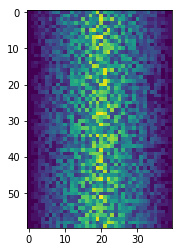

In [52]:
import matplotlib.pyplot as plt # Import matplotlib library for interactive plotting. The 'as plt' is an alias.
image  = plt.imshow(data)
plt.show()

Blue regions in this heat map are low values, while yellow shows high values.
As we can see,
inflammation rises and falls over a 40-day period.

Let's take a look at the average inflammation over time:

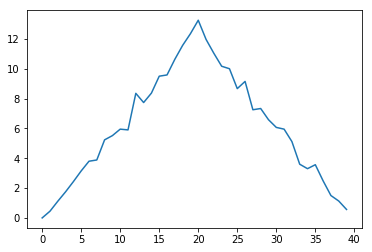

In [53]:
ave_inflammation = data.mean(axis=0)
ave_plot = plt.plot(ave_inflammation)
plt.show()

Here,
we have put the average per day across all patients in the variable `ave_inflammation`,
then asked `matplotlib.pyplot` to create and display a line graph of those values.
The result is roughly a linear rise and fall,
which is suspicious:
based on other studies,
we expect a sharper rise and slower fall.
Let's have a look at two other statistics:

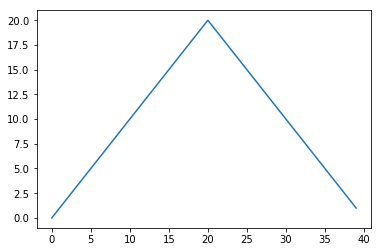

In [54]:
max_plot = plt.plot(data.max(axis=0))
plt.show()

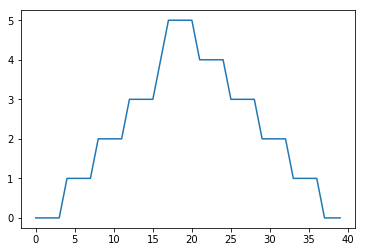

In [55]:
min_plot = plt.plot(data.min(axis=0))
plt.show()


The maximum value rises and falls perfectly smoothly,
while the minimum seems to be a step function.
Neither result seems particularly likely,
so either there's a mistake in our calculations
or something is wrong with our data.

You can group similar plots in a single figure using subplots.
This script below uses a number of new commands. 

* The function `plt.figure()`
creates a space into which we will place all of our plots. 
* The parameter `figsize`
tells Python how big to make this space. 
* Each subplot is placed into the figure using
its `add_subplot` method. The `add_subplot` method takes 3 parameters. The first denotes
how many total rows of subplots there are, the second parameter refers to the
total number of subplot columns, and the final parameters denotes which subplot
your variable is referencing (left-to-right, top-to-bottom). 
* Each subplot is stored in a
different variable (`axes1`, `axes2`, `axes3`). 
* Once a subplot is created, the axes can
be titled using the `set_xlabel()` command (or `set_ylabel()`).

### Library aliases

It's very common to create an alias for a library when importing it
in order to reduce the amount of typing we have to do. You'll see the following aliases
for numpy and matplotlib almost anytime they are used.
Here are our three plots side by side using aliases for `numpy` and `pyplot`:

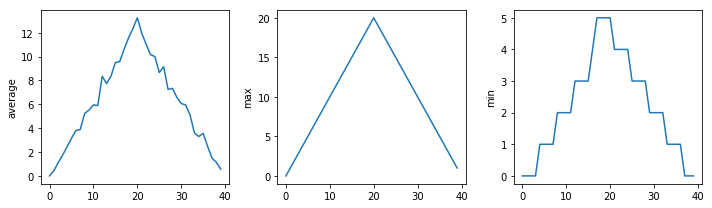

In [56]:
# Load libraries
import numpy as np     # np is the alias & plt as alias. Short hand name for numpy & matplotlib
import matplotlib.pyplot as plt 

# Read data from csv to a numpy array
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

# Create a container for a matplot lib figure that is 10' x 3'
fig = plt.figure(figsize=(10.0, 3.0))

# Create 3 subplots
axes1 = fig.add_subplot(1, 3, 1) # 1 row x 3 cols, plot 1
axes2 = fig.add_subplot(1, 3, 2) # 1 row x 3 cols, plot 2
axes3 = fig.add_subplot(1, 3, 3) # 1 row x 3 cols, plot 3

# Plots means (across patients) for each time period in subplot 1
axes1.set_ylabel('average')
axes1.plot(data.mean(axis=0))

# Plots maximums (across patients) for each time period in subplot 2
axes2.set_ylabel('max')
axes2.plot(data.max(axis=0))

# Plots minimums (across patients) for each time period in subplot 3
axes3.set_ylabel('min')
axes3.plot(data.min(axis=0))

# Set a layout property for the figure
fig.tight_layout()

# Actually show the plot
plt.show()

The [call](reference.html#function-call) to `loadtxt` reads our data,
and the rest of the program tells the plotting library
how large we want the figure to be,
that we're creating three subplots,
what to draw for each one,
and that we want a tight layout.
(Perversely,
if we leave out that call to `fig.tight_layout()`,
the graphs will actually be squeezed together more closely.)


#### Key Points

*   Import a library into a program using `import libraryname`.
*   Use the `numpy` library to work with arrays in Python.
*   Use `variable = value` to assign a value to a variable in order to record it in memory.
*   Variables are created on demand whenever a value is assigned to them.
*   Use `print something` to display the value of `something`.
*   The expression `array.shape` gives the shape of an array.
*   Use `array[x, y]` to select a single element from an array.
*   Array indices start at 0, not 1.
*   Use `low:high` to specify a slice that includes the indices from `low` to `high-1`.
*   All the indexing and slicing that works on arrays also works on strings.
*   Use `# some kind of explanation` to add comments to programs.
*   Use `array.mean()`, `array.max()`, and `array.min()` to calculate simple statistics.
*   Use `array.mean(axis=0)` or `array.mean(axis=1)` to calculate statistics across the specified axis.
*   Use the `pyplot` library from `matplotlib` for creating simple visualizations.

### Challenge: Sorting out references

What does the following program print out?

~~~
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)
~~~


### Challenge: Slicing strings

A section of an array is called a [slice](reference.html#slice).
We can take slices of character strings as well:


In [57]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

Hopper Grace


In [58]:
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])

first three characters: oxy
last three characters: gen


What is the value of `element[:4]`?
What about `element[4:]`?
Or `element[:]`?

What is `element[-1]`?
What is `element[-2]`?
Given those answers,
explain what `element[1:-1]` does.

In [62]:
# Try it out yourself
print(element[:4], element[-1])
#print(element[-1]) # prints the last element of oxygen

oxyg n


### Challenge: Thin slices

The expression `element[3:3]` produces an [empty string](reference.html#empty-string),
i.e., a string that contains no characters.
If `data` holds our array of patient data,
what does `data[3:3, 4:4]` produce?
What about `data[3:3, :]`?

### Challenge: plot scaling

Why do all of our plots stop just short of the upper end of our graph?

### Challenge: drawing straight lines
Why are the vertical lines in our plot of the minimum inflammation per day not perfectly vertical?

### Challenge: Make your own plot

Create a plot showing the standard deviation (`numpy.std`) of the inflammation data for each day across all patients.


### Challenge: Moving plots around

Modify the program to display the three plots on top of one another instead of side by side.

## Solution to the first Linux shell command challenge
The key is using the `-o` option with grep. This prints each found comma (from a single line in the csv file) out on a separate line. Then `wc -l` simply counts these lines.

In [ ]:
!head -1 data/inflammation-01.csv | grep -o , | wc -l